In [90]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Salinity

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Salinity


In [91]:
import pandas as pd
#Loading the dataset
df=pd.read_csv('ECML.csv',nrows=10000, encoding='utf-8-sig')
#df = pd.read_excel(file_path)

In [92]:
df.head()

,EC,PH,OM,P,K,SP,aspect,elevation,slope,cvi,...,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SARVV,SARVH,TWI
0,0.57,8.0,0.40,12.45,76,32,90.0000,131,1.06831,2.94441,...,0.192168,0.209620,0.296448,0.456540,0.402205,0.511961,0.639277,-8.488977,-15.847992,0.298231
1,0.75,8.0,1.15,3.64,98,46,330.1330,122,2.13809,2.19819,...,0.181019,0.197920,0.279986,0.459400,0.498877,0.506518,0.676360,-7.163118,-15.447044,-17.025160
2,0.82,8.0,0.87,3.60,153,32,48.7982,99,1.40775,2.73455,...,0.187973,0.220905,0.256184,0.465686,0.449653,0.444705,0.410518,-7.875657,-15.985669,-14.299210
3,0.90,8.7,0.77,2.38,246,34,0.0000,118,1.85433,2.77518,...,0.116115,0.234821,0.332311,0.454718,0.409036,0.513749,0.600761,-8.233532,-16.199184,-16.201850
4,0.94,8.0,0.63,6.90,63,34,0.0000,81,4.62737,2.96288,...,0.172457,0.191708,0.271306,0.448142,0.489471,0.504088,0.658287,-8.448012,-16.169887,-14.895810


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   EC         109 non-null    float64
 1   PH         109 non-null    float64
 2   OM         109 non-null    float64
 3   P          109 non-null    float64
 4   K          109 non-null    int64  
 5   SP         109 non-null    int64  
 6   aspect     109 non-null    float64
 7   elevation  109 non-null    int64  
 8   slope      109 non-null    float64
 9   cvi        109 non-null    float64
 10  evi        109 non-null    float64
 11  ndvi       109 non-null    float64
 12  SI1        109 non-null    float64
 13  SI2        109 non-null    float64
 14  SI3        109 non-null    float64
 15  SI4        109 non-null    float64
 16  SI5        109 non-null    float64
 17  SI6        109 non-null    float64
 18  SI7        109 non-null    float64
 19  SARVV      109 non-null    float64
 20  SARVH     

In [94]:
X = df.drop("EC",axis=1)   #Feature Matrix
y = df["EC"]

In [95]:
X.head()

,PH,OM,P,K,SP,aspect,elevation,slope,cvi,evi,...,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SARVV,SARVH,TWI
0,8.0,0.40,12.45,76,32,90.0000,131,1.06831,2.94441,0.381664,...,0.192168,0.209620,0.296448,0.456540,0.402205,0.511961,0.639277,-8.488977,-15.847992,0.298231
1,8.0,1.15,3.64,98,46,330.1330,122,2.13809,2.19819,0.391243,...,0.181019,0.197920,0.279986,0.459400,0.498877,0.506518,0.676360,-7.163118,-15.447044,-17.025160
2,8.0,0.87,3.60,153,32,48.7982,99,1.40775,2.73455,0.360726,...,0.187973,0.220905,0.256184,0.465686,0.449653,0.444705,0.410518,-7.875657,-15.985669,-14.299210
3,8.7,0.77,2.38,246,34,0.0000,118,1.85433,2.77518,0.272340,...,0.116115,0.234821,0.332311,0.454718,0.409036,0.513749,0.600761,-8.233532,-16.199184,-16.201850
4,8.0,0.63,6.90,63,34,0.0000,81,4.62737,2.96288,0.440921,...,0.172457,0.191708,0.271306,0.448142,0.489471,0.504088,0.658287,-8.448012,-16.169887,-14.895810


In [96]:
y.head()

0    0.57
1    0.75
2    0.82
3    0.90
4    0.94
Name: EC, dtype: float64

In [ ]:
df.info()

In [ ]:
X.info()

In [99]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
import torch
import torch.nn as nn
import torch.optim as optim

In [113]:
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

## **convert float**

In [101]:
import pandas as pd

# Convert integer columns to float
X = X.astype(float)
y = y.astype(float)


In [ ]:
X.info()

In [ ]:
y.head()

0    0.57
1    0.75
2    0.82
3    0.90
4    0.94
Name: EC, dtype: float64

# **VIF with RFE (RF)**

In [83]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
y_train

15      1.23
44      2.32
89      8.89
90      9.30
9       1.10
       ...  
71      5.10
14      1.20
92      9.39
51      2.70
102    11.50
Name: EC, Length: 81, dtype: float64

In [142]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Calculate VIF for NumPy arrays
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = range(X.shape[1])  # Use indices as feature names for NumPy arrays
    vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    return vif_data

# Identify features with high VIF
def identify_high_vif_features(vif_results, threshold=8):
    return vif_results[vif_results['VIF'] > threshold]['Feature']

# Remove features with high VIF for NumPy arrays
def remove_high_vif_features(X, high_vif_features):
    high_vif_indices = high_vif_features  # Assuming high_vif_features contains feature indices directly
    return np.delete(X, high_vif_indices, axis=1)

# Fit RFE with advanced ML model
def fit_rfe(X, y, n_features_to_select=10):
    estimator = RandomForestRegressor()  # Choose your advanced ML model here
    selector = RFE(estimator, n_features_to_select=n_features_to_select, step=1,)
    selector.fit(X, y)
    return selector.support_

# Assuming X_train and y_train are your NumPy arrays
# Step 1: Calculate VIF
vif_results = calculate_vif(X_train)

# Step 2: Identify features with high VIF
high_vif_features = identify_high_vif_features(vif_results)

# Step 3: Remove features with high VIF
X_train_filtered = remove_high_vif_features(X_train, high_vif_features)

# Step 4: Perform RFE with advanced ML model
selected_features = fit_rfe(X_train_filtered, y_train)

# Print selected features
print("Selected Features after RFE:")
print(selected_features)

Selected Features after RFE:
[ True  True False False  True False  True False False False  True  True
 False False False  True  True  True  True False]


In [143]:
# Print selected features with index numbers
print("\nSelected Features after RFE with RFECV (Top 10):")
for index, feature_selected in enumerate(selected_features):
    if feature_selected:
        print(f"Feature {index}")



Selected Features after RFE with RFECV (Top 10):
Feature 0
Feature 1
Feature 4
Feature 6
Feature 10
Feature 11
Feature 15
Feature 16
Feature 17
Feature 18


In [121]:
# Calculate VIF for all features
vif_values = calculate_vif(X_train_scaled)
print("\nVIF values for all features:")
print(vif_values)



VIF values for all features:
    Feature       VIF
0         0  1.027932
1         1  1.020887
2         2  1.021473
3         3  1.018225
4         4  1.015980
5         5  1.008614
6         6  1.022543
7         7  1.016532
8         8  1.025415
9         9  1.028673
10       10  1.032684
11       11  1.026673
12       12  1.028790
13       13  1.026364
14       14  1.023839
15       15  1.019269
16       16  1.033704
17       17  1.017303
18       18  1.016591
19       19  1.019588


In [ ]:
import matplotlib.pyplot as plt

# Plot the selected features
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_features)), selected_features)
plt.xlabel('Feature Index')
plt.ylabel('Selected')
plt.title('Selected Features after RFE')
plt.show()


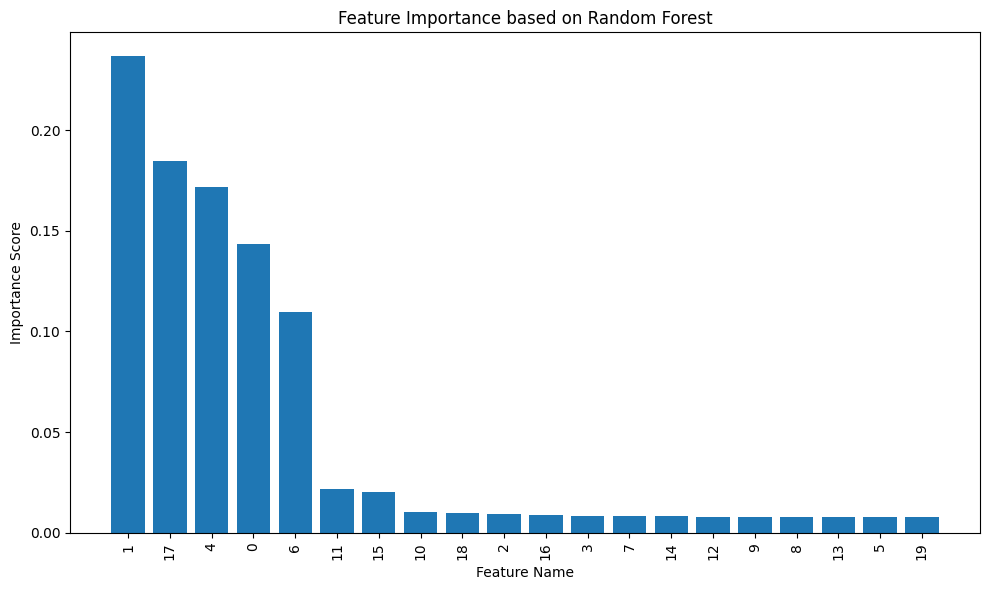

In [147]:
# Train a Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_filtered, y_train)

# Get feature importances from the trained RF model
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_indices, rotation=90)  # Assuming feature indices as x-axis labels
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.title('Feature Importance based on Random Forest')
plt.tight_layout()
plt.show()

In [148]:
# Print feature names and their importance scores
for feature_name, importance_score in zip(sorted_feature_names, sorted_feature_importances):
    print(f"Feature: {feature_name}, Importance Score: {importance_score}")


Feature: 1, Importance Score: 0.2366426002132399
Feature: 17, Importance Score: 0.18470470104217174
Feature: 4, Importance Score: 0.1717286281572895
Feature: 0, Importance Score: 0.14362642917677626
Feature: 6, Importance Score: 0.10983047608651648
Feature: 11, Importance Score: 0.021905601691228488
Feature: 15, Importance Score: 0.020209555914345496
Feature: 16, Importance Score: 0.01045470476404474
Feature: 18, Importance Score: 0.00993470724838195
Feature: 14, Importance Score: 0.009658553701546661
Feature: 13, Importance Score: 0.009076144753996991
Feature: 2, Importance Score: 0.008608567513399206
Feature: 10, Importance Score: 0.008401613927144395
Feature: 7, Importance Score: 0.008255584969874497
Feature: 12, Importance Score: 0.007965957466307901
Feature: 3, Importance Score: 0.007857157990686765
Feature: 5, Importance Score: 0.007835164282782758
Feature: 19, Importance Score: 0.007806844572697689
Feature: 8, Importance Score: 0.007795756887319195
Feature: 9, Importance Score: 